In [1]:
import sys
sys.path.insert(0,'..')
sys.path.insert(0,'/Users/ryan/github/prosodic')
from llmdh import *
import prosodic
prosodic.USE_CACHE=False

In [2]:
# RhymeLLM.gather()

In [3]:
@classmethod
def gather_kaggle(self):
    with SqliteDict(PATH_OUTPUT,flag='r') as db:
        return pd.DataFrame(db[k] for k in db.keys())

RhymeLLM.gather_kaggle = gather_kaggle

In [4]:
# RhymeLLM.gather_kaggle()

In [5]:
@classmethod
def gather_all(self):
    df1=self.gather()
    df2=self.gather_kaggle()
    return pd.concat([df1.assign(corpus="LLM"),df2.assign(corpus="poetryfoundation.org")]).fillna('')

RhymeLLM.gather_all = gather_all

In [6]:
df = RhymeLLM.gather_all()

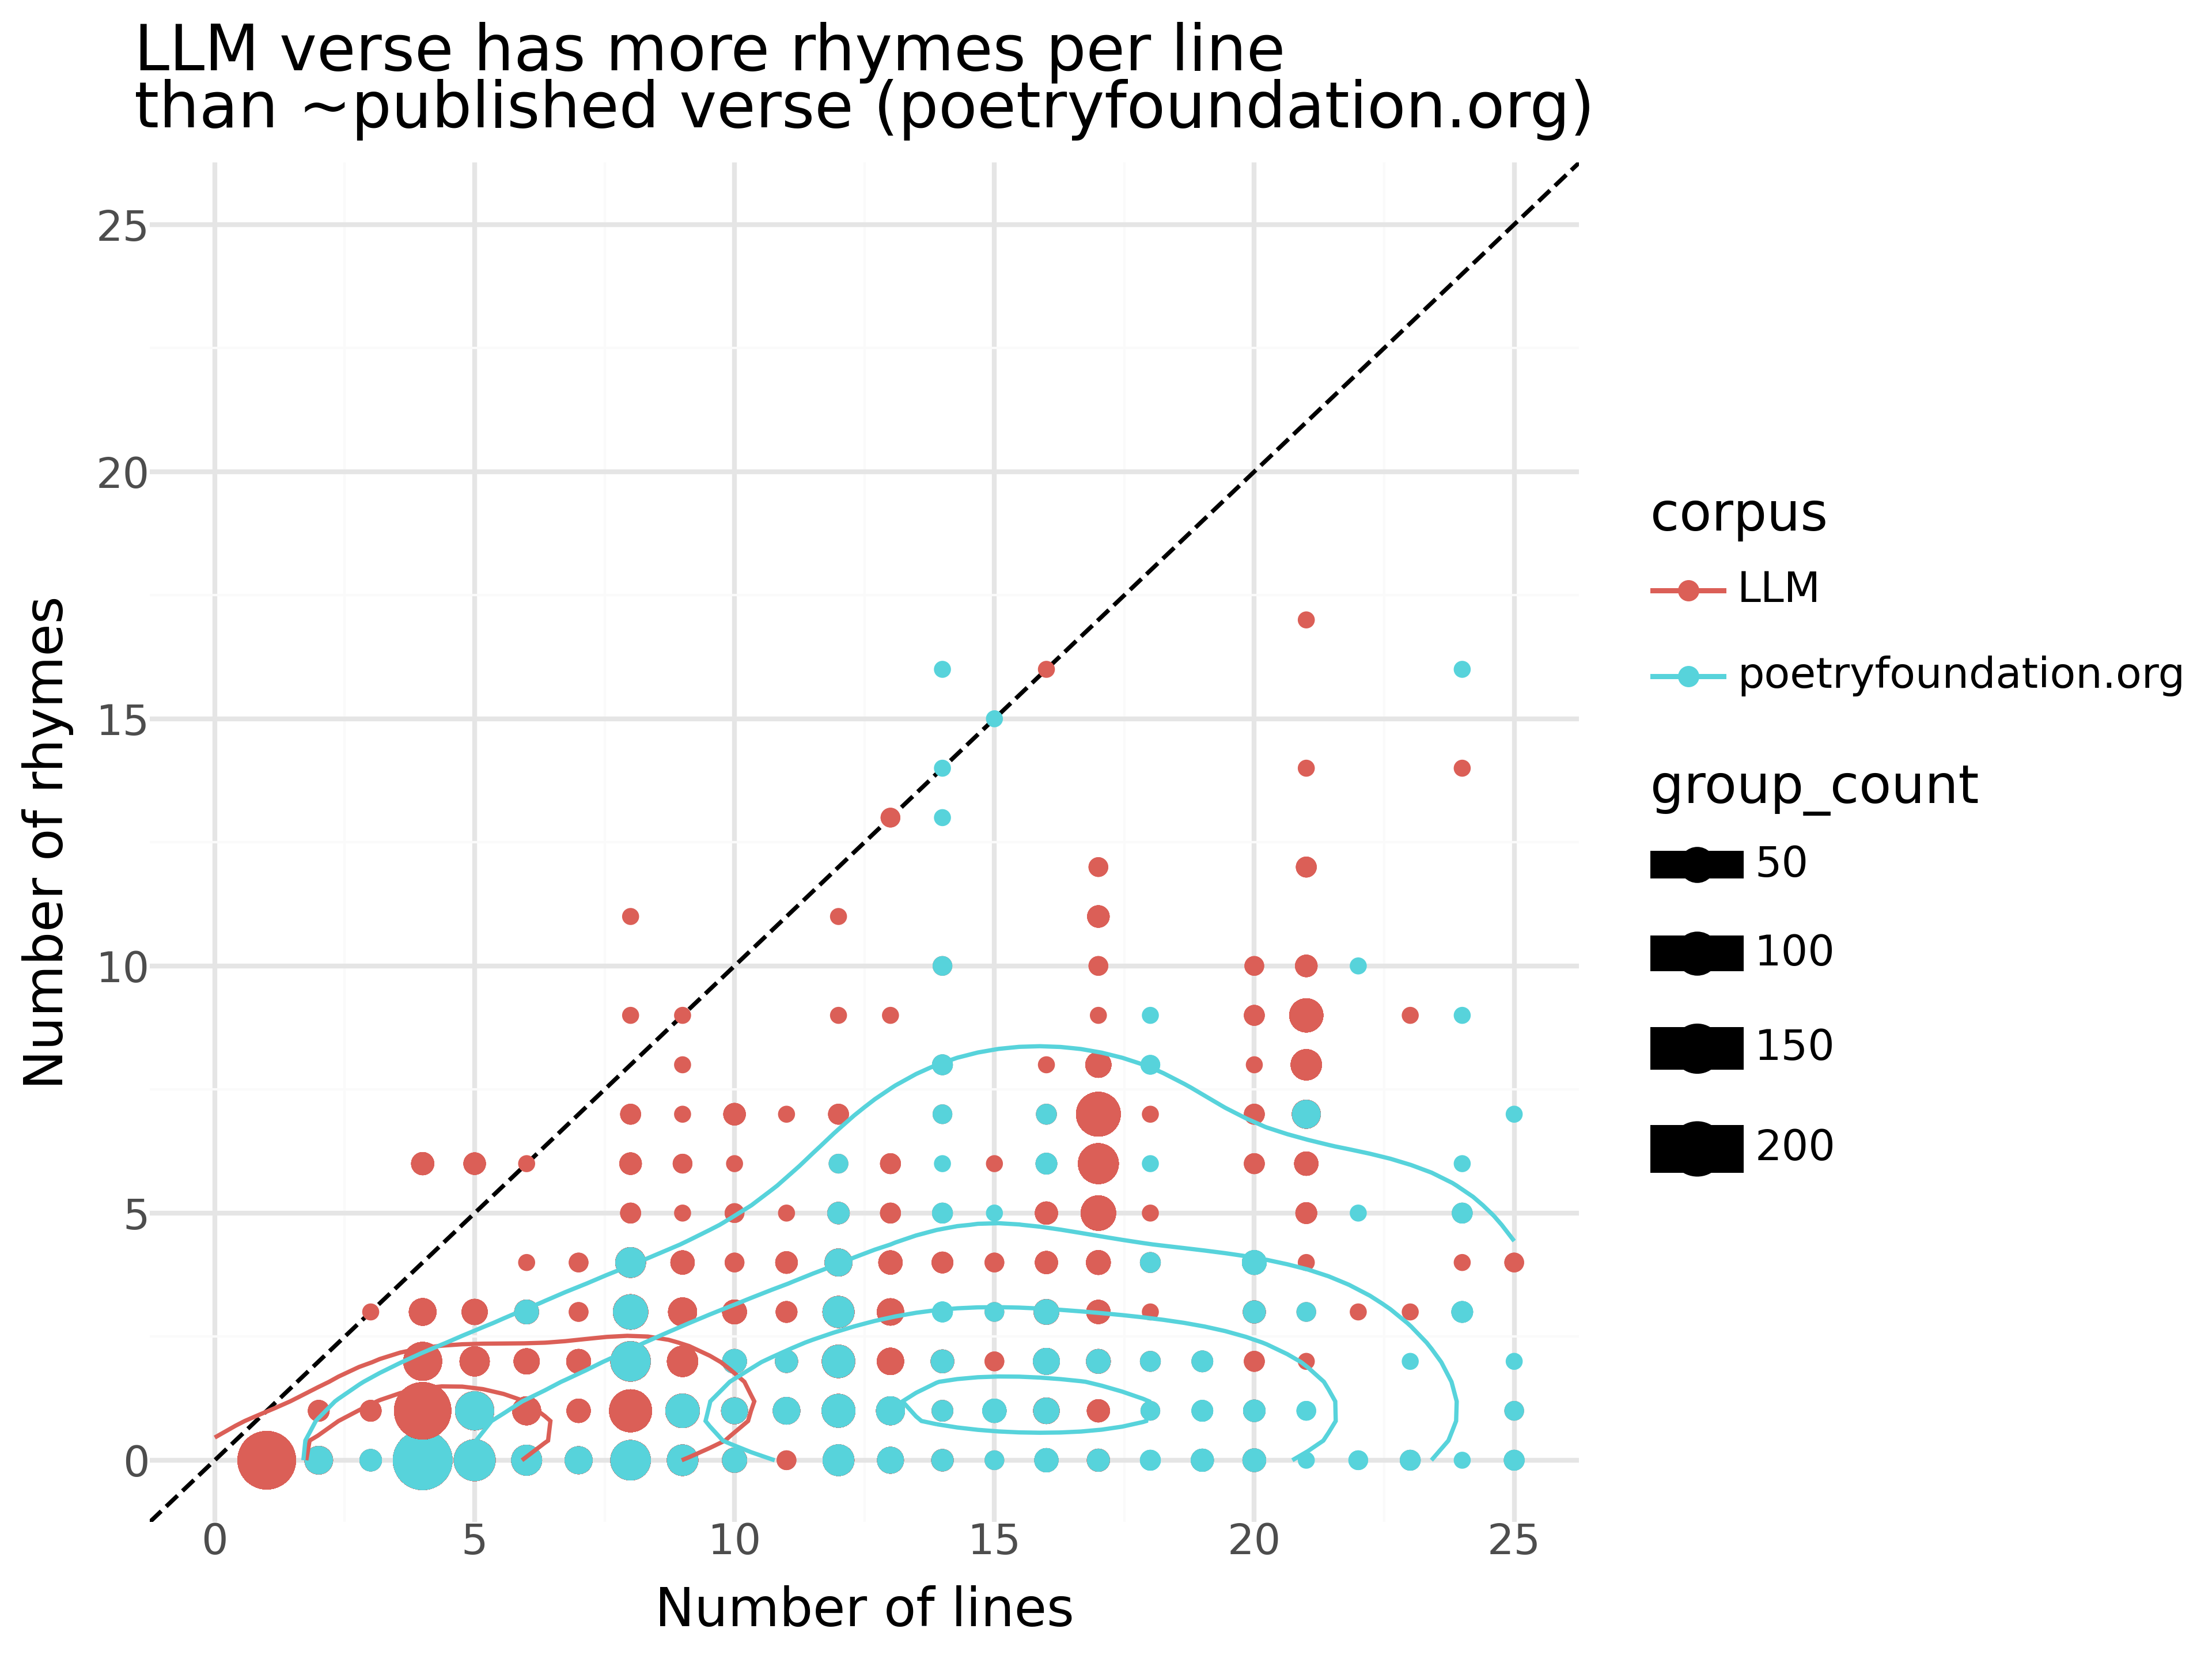

In [22]:
# !pip install plotnine
import plotnine as p9
p9.options.dpi = 300
figdf = df.query('num_rhymes <= 25 & num_lines <= 25')
figdf = pd.concat(
    gdf.assign(group_count=len(gdf))
    for g,gdf in figdf.groupby(['num_rhymes','num_lines'])
)
fig = p9.ggplot(figdf, p9.aes(x='num_lines', y='num_rhymes', color='corpus', size='group_count'))
fig += p9.geom_abline(intercept=0, slope=1, linetype='dashed')
fig+= p9.geom_point()
fig+= p9.geom_density_2d()
fig+=p9.scale_y_continuous(limits=(0,25))
fig+=p9.scale_x_continuous(limits=(0,25))
fig+=p9.theme_minimal()
fig+=p9.labs(
    x='Number of lines',
    y='Number of rhymes',
    color='corpus',
    title='LLM verse has more rhymes per line\nthan ~published verse (poetryfoundation.org)'
)
fig.save('fig.2ddensity.png')
fig

In [18]:
!open .

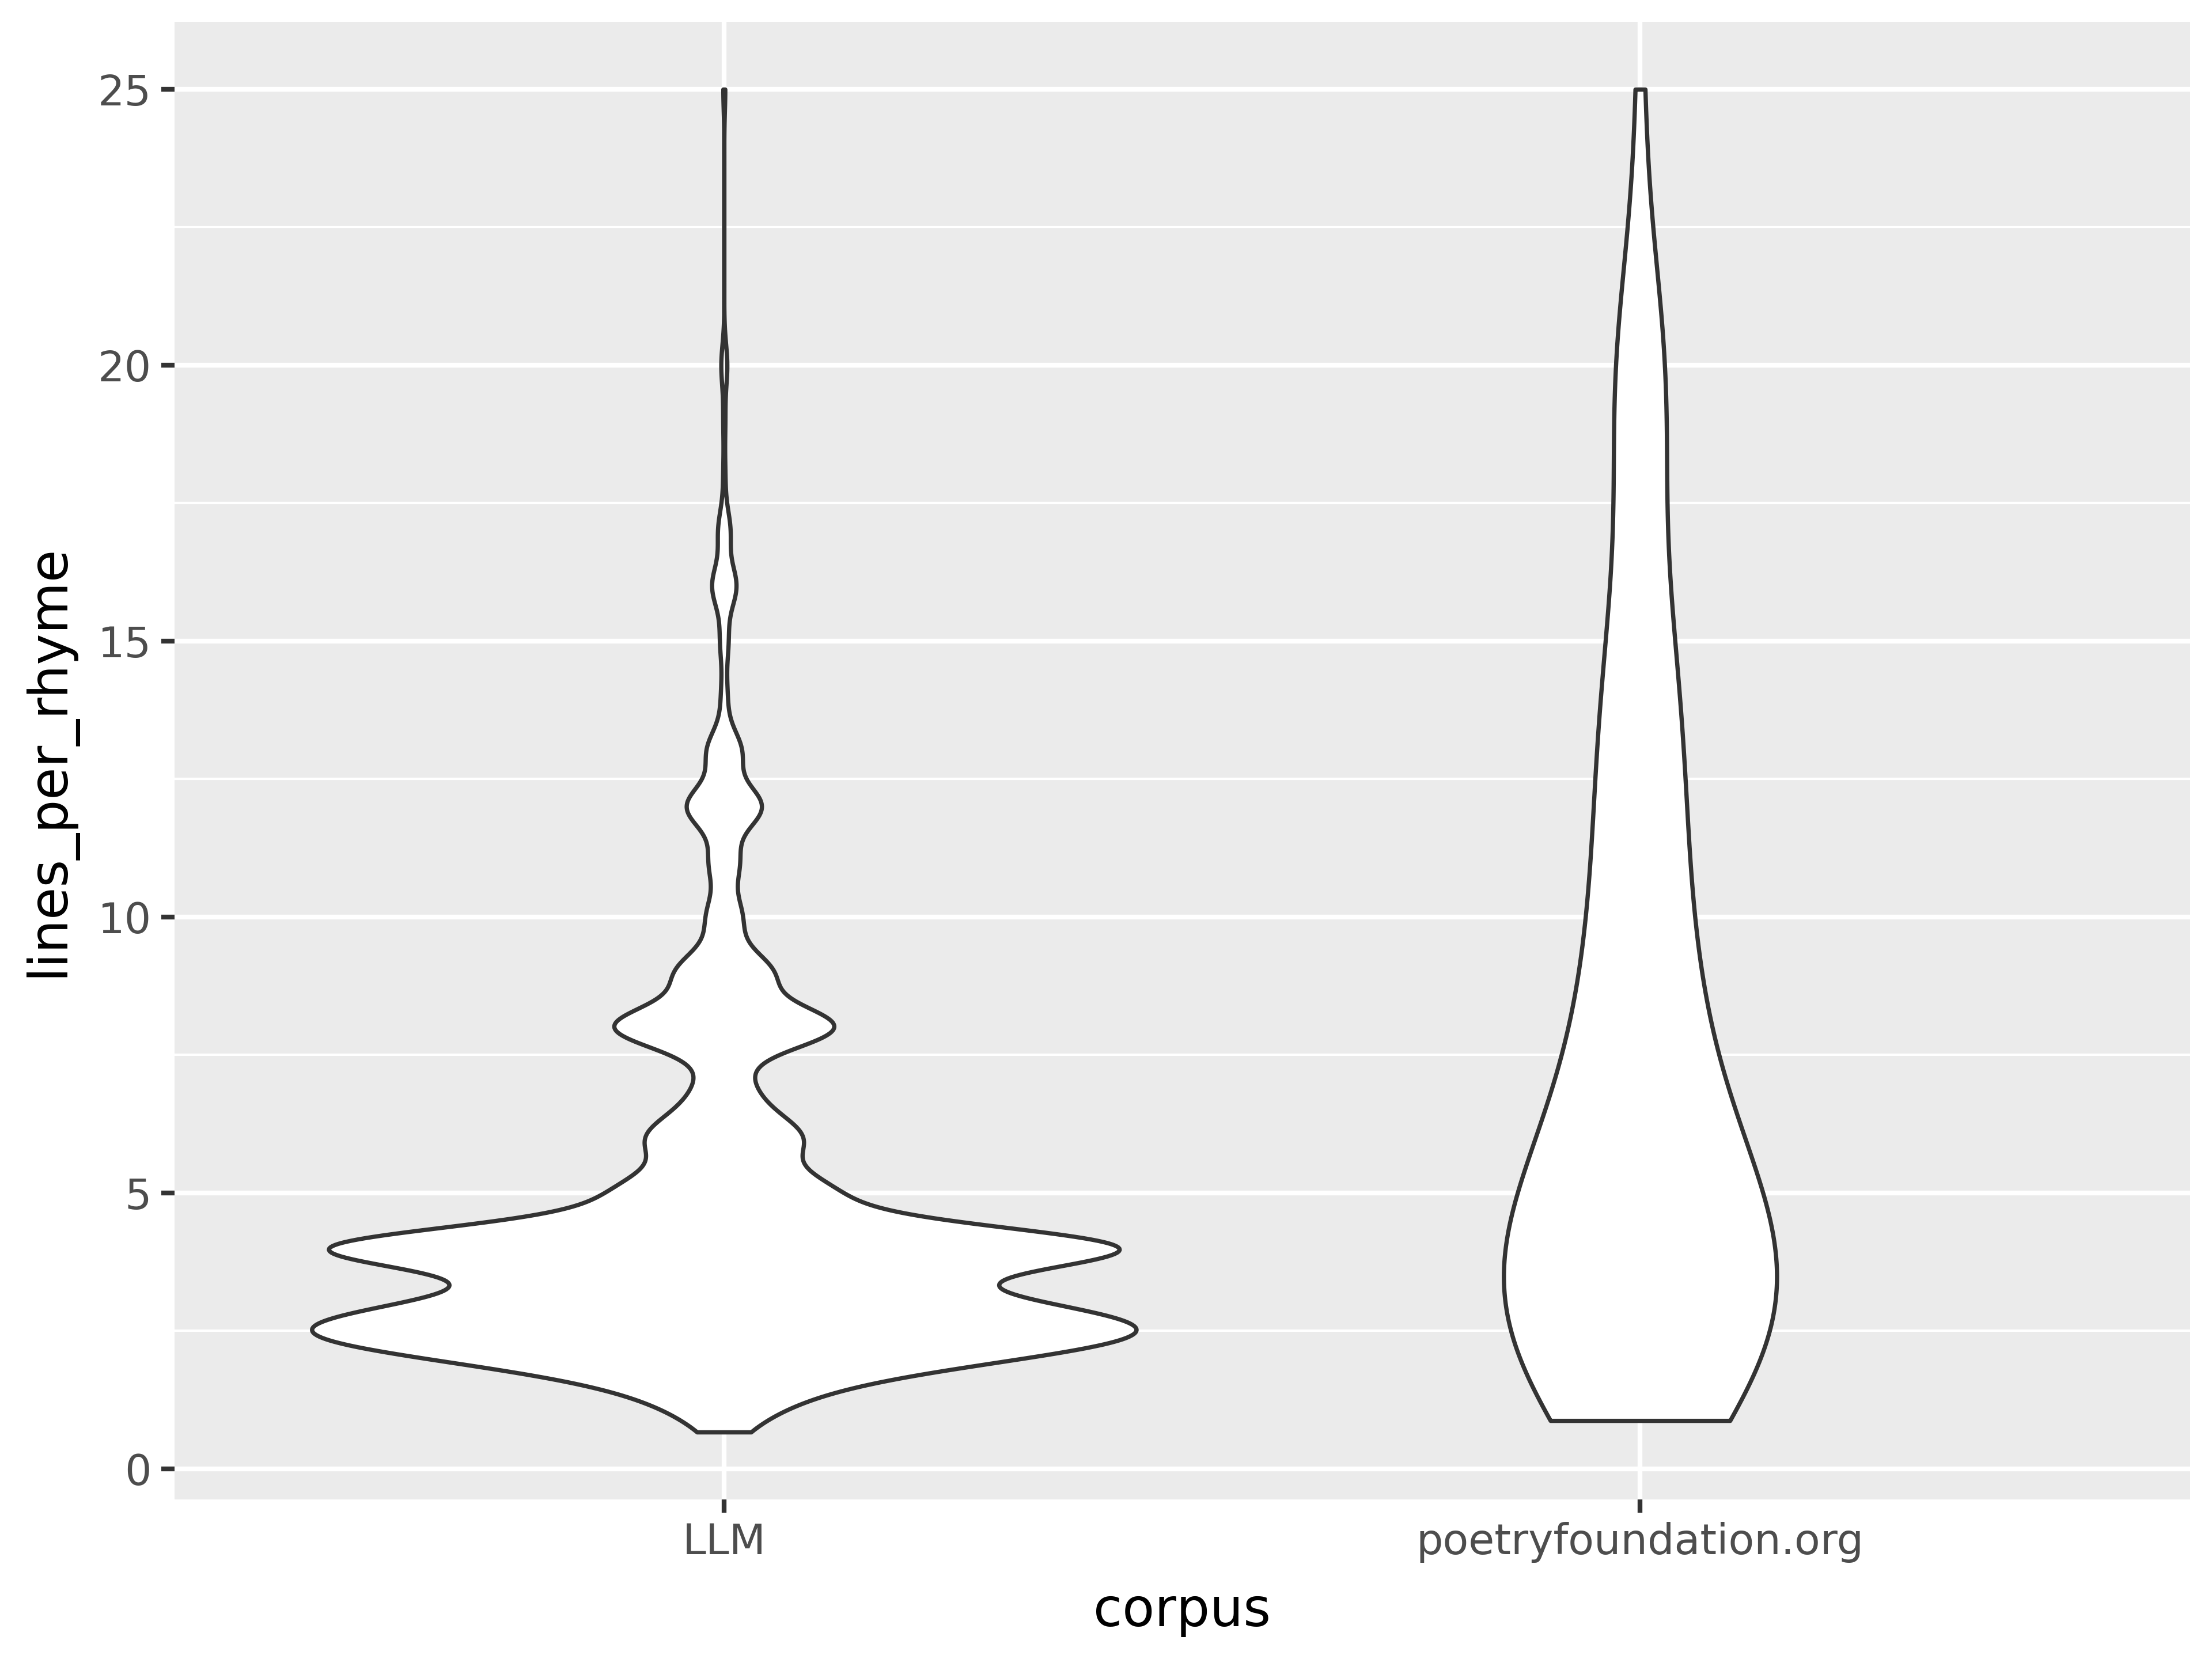

In [42]:
df['lines_per_rhyme'] = df['num_lines'] / df['num_rhymes']
figdf = df.query('num_rhymes <= 25 & num_lines <= 25')
fig = p9.ggplot(figdf, p9.aes(x='corpus', y='lines_per_rhyme')) + p9.geom_violin()
fig

In [32]:
df[df.num_lines==12].corpus.value_counts()

corpus
LLM                     156
poetryfoundation.org     10
Name: count, dtype: int64

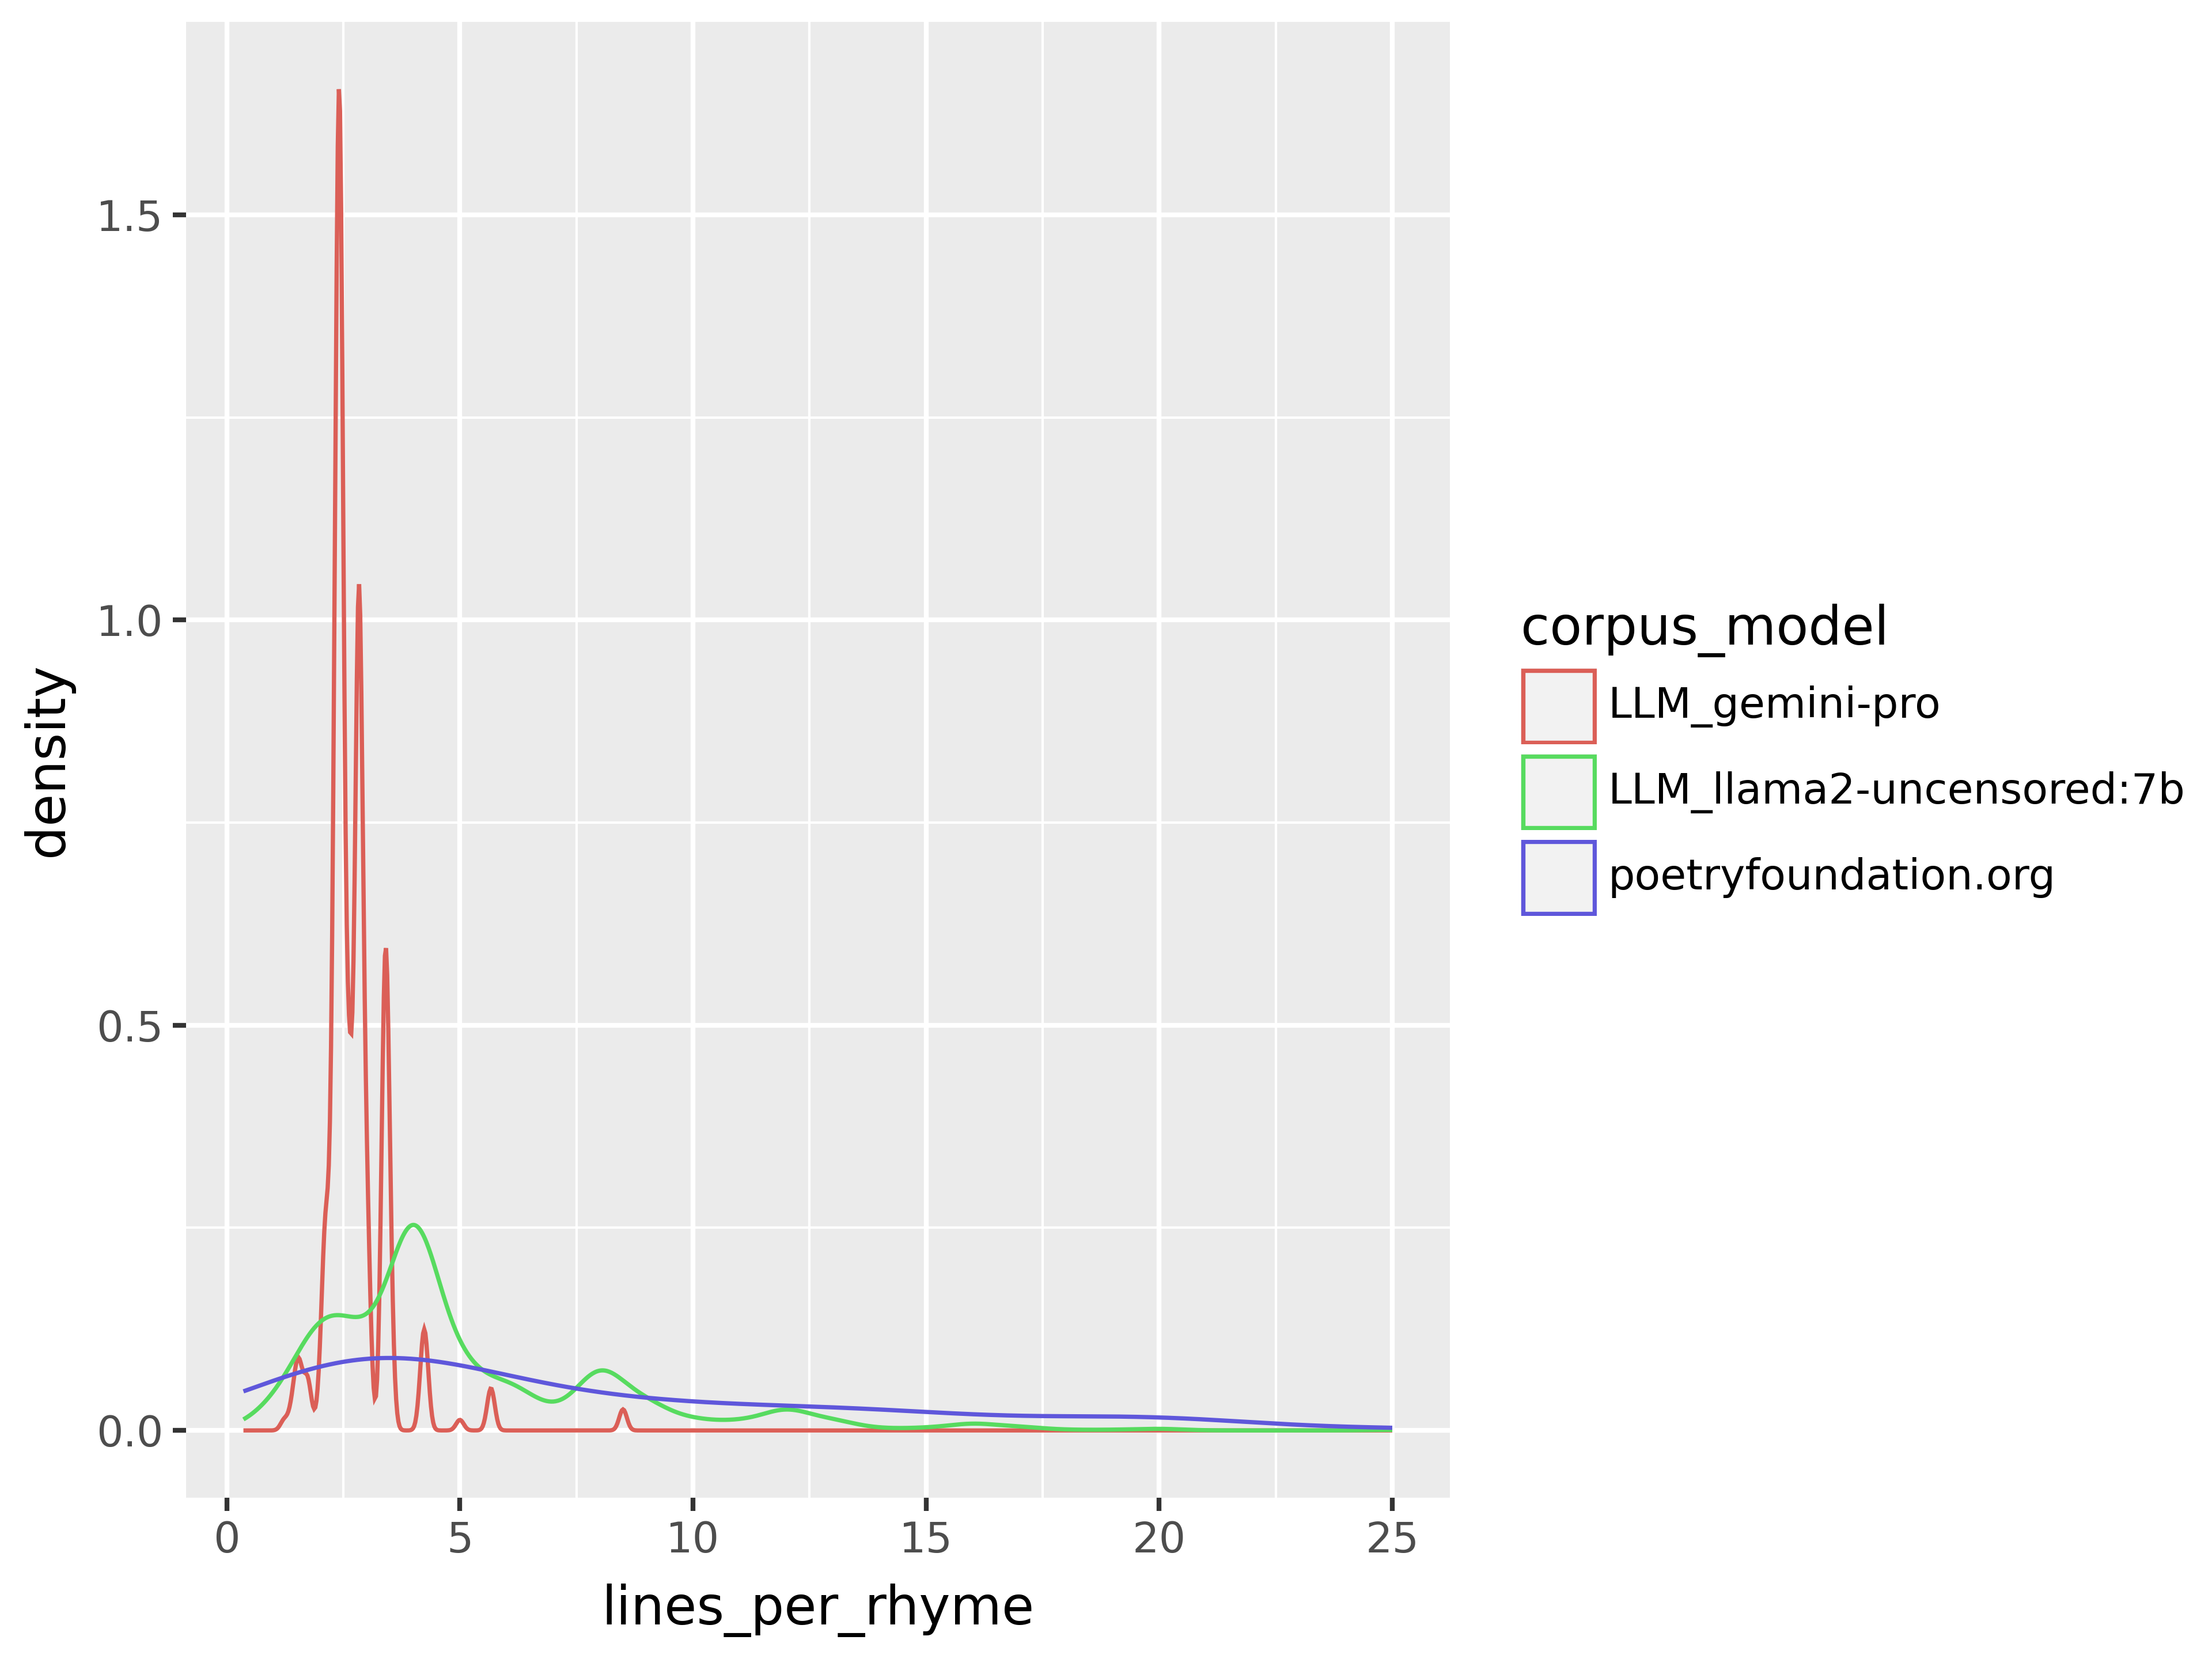

In [40]:
df['corpus_model']=[f'{corpus}_{model}' if model else corpus for corpus,model in zip(df.corpus, df.model)]
figdf = df.query('num_lines <= 25')
p9.ggplot(figdf, p9.aes(x='lines_per_rhyme', color='corpus_model')) + p9.geom_density()